# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [9]:
import zipfile

from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

# Face detection function from a given file in the zip folder 

In [10]:
# Generate face coordinates from an Image given a cv image file
def face_coordinate_generator(imagefile):
    '''generates coordinates for a face in a given image with faces
    :param imagefile: the PIL image file
    :return: ndarray of face coordinates in (x,y,w,h) format
    '''
    import cv2 as cv
    # After lots of testing, use the following parameters for testing :
    # Scale = 1.35
    # min neighbours = 5 in face cascade function

    image_with_faces = imagefile
    face_cascade = cv.CascadeClassifier(
        'readonly/haarcascade_frontalface_default.xml')
    
    #  OpenCV is return the coordinates as (x,y,w,h)
    face_coordinates = face_cascade.detectMultiScale(np.array(image_with_faces), 1.35, 5)

    return face_coordinates


# Contact sheet of faces generator from a given file 

In [11]:
# function to generate contact sheet of all faces from a given PIL image and face coordinates
def contactsheet_faces(face_coordinates, file_with_faces):
    '''given face coordinates and file on which faces are, returns a contactsheet containg all the faces in the file
    :param face_coordinates: A ndarray with all the face coordinates generated from openCV 
    :param file_with_faces: PIL Image on which faces are
    :return : a PIL image containing all the faces 
    '''
    import PIL
    from PIL import Image
    pil_img = file_with_faces
    allfaces = []

    MAX_SIZE = (100, 100)  # thumbain size (width,length)
    for x, y, w, h in face_coordinates:

        single_face = pil_img.crop((x, y, x+w, y+h))

        single_face.thumbnail(MAX_SIZE)
        allfaces.append(single_face)

    if len(allfaces) == 0:
        print("NO FACES IN FILE DETECTED")
        return None

    # create a contact sheet
    images_in_row = 5
    contact_sheet = PIL.Image.new(mode=allfaces[0].mode,
                                  size=(MAX_SIZE[0]*images_in_row, (MAX_SIZE[1]*((len(allfaces)//images_in_row)+1))))
    # Pasting images on contact_sheet
    x = 0
    y = 0

    for img in allfaces:
        # Lets paste the current image into the contact sheet
        contact_sheet.paste(img, (x, y))
        first_image = allfaces[0]
        # Now we update our X position. If it is going to be the width of the image, then we set it to 0
        # and update Y as well to point to the next "line" of the contact sheet.
        if x+first_image.width == contact_sheet.width:
            x = 0
            y = y+first_image.height
        else:
            x = x+first_image.width

    return contact_sheet


# Search for a given text in an image

In [12]:
# Searching for text and if text found, generating contact sheet output
def text_search_in_image(text, image):
    '''Searches a given text using OCR in a PIL Image and returns True if text found 
    :param text: a string containg text to be searched
    :param image: a PIL image 
    :return : True if text found in image, False if not 
    '''
    img = image
    text = text.lower()

    alltext = pytesseract.image_to_string(img)
    alltext = alltext.lower()
    if text in alltext:
        return True
    else:
        return False


# Opening Zip files and getting Images 

In [13]:
# Opening Zip files and getting Images 
from zipfile import ZipFile

def zip_file_handler(file_dir):
    '''takes a filepath and returns a list of all the images in the zip file
    :param file_dir: file directory in string format
    :return : a list of all images in the file
    '''
    import os
    from os import listdir
    parentdir = file_dir[:-4]
    with ZipFile(file_dir, 'r') as zip:
    # printing all the contents of the zip file
        import os


        dir = parentdir
        os.mkdir(dir)
        
        zip.extractall(dir)
        files = os.listdir(dir)
        images = [file for file in files if file.endswith('.png')]
        images = sorted(images)
        
    return images
            


# Final Function to generate output

In [14]:
def text_search_image_generator(text,imfolder):
    '''Displays contact sheet of faces in all the images in a given zip folder containing image files if image contains the search text
    :param text: Search text 
    :param imfolder: file directory of the images 
    :return : None
    '''
    import PIL
    searchtext = text
    
    imagelist = zip_file_handler(imfolder)
    
    
    count = 0
    for image in imagelist:
        im = Image.open(image)
        if text_search_in_image(searchtext,im):
            print(f'Results found in file {image}')
            sheet = contactsheet_faces(face_coordinate_generator(im),im)
            if type(sheet) != None:
                display(sheet)
            else:
                continue
            count += 1
                
        else:
            continue
            
            
        
    

Results found in file a-0.png


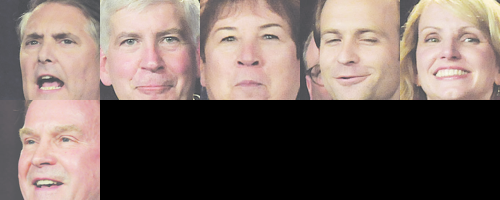

Results found in file a-3.png


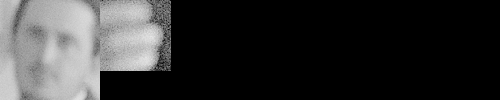

0

In [15]:
file_directory = 'readonly/small_img.zip'
search_text = 'Christopher'
text_search_image_generator(search_text,file_directory)
os.system('say "your program has finished"')


In [18]:
file_dir = 'readonly/images'
files = os.listdir(file_dir)

images = [file for file in files if file.endswith('.png')]
images = sorted(images)
text_search_image_generator('Mark', )



0